# Question-1

Predict delivery time using sorting time

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
dataset = pd.read_csv(r"C:\Users\ROHINI\Downloads\delivery_time.csv")

In [4]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA And Data Visualization

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Feature Engineering

In [7]:
# Renaming Columns
data=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
from scipy.stats import skew
print(skew(data.delivery_time))

0.326702631656106


C:\Users\ROHINI\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time'>

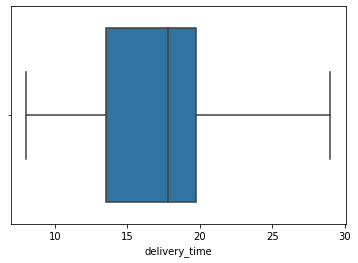

In [13]:
sns.boxplot(data['delivery_time'], orient = 'h')

* The data for Delivery time is skewed left.

* All the observations lies in the intervals of approximately 13 to 20

* We can say that the median delivery time is around 18-19.

C:\Users\ROHINI\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

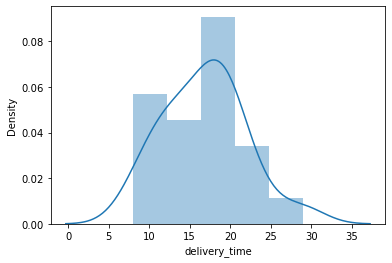

In [17]:
sns.distplot(data['delivery_time'])

* The distribution of 'Delivery Time' data is slightly more on the left of the curve

In [18]:
print(skew(data.sorting_time))

0.043680994983108075


C:\Users\ROHINI\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sorting_time'>

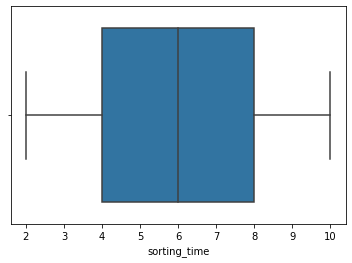

In [16]:
sns.boxplot(data['sorting_time'], orient='h')

* The observations for Sorting Time lies nearly between 4 to 8.
* It means the Sorting Time data is symmetric and skewed.
* The median sorting time is approximately around 6.

C:\Users\ROHINI\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

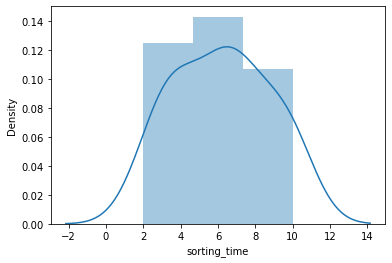

In [19]:
sns.distplot(data['sorting_time'])

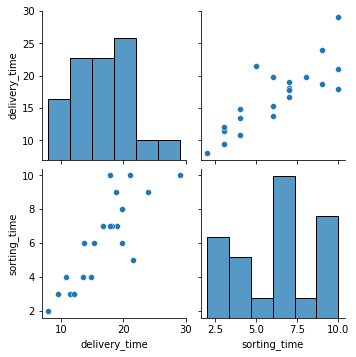

In [20]:
sns.pairplot(data)

## Corelation analysis

In [21]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:>

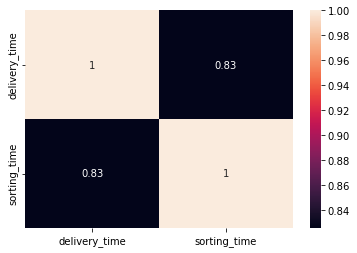

In [22]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

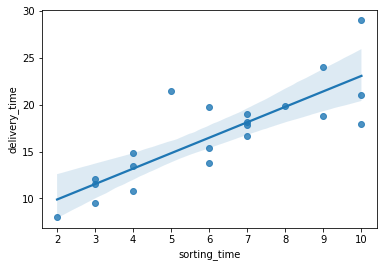

In [23]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

# Model building

In [24]:
model1=smf.ols("delivery_time~sorting_time",data=data).fit()

In [25]:
model1

## Model Testing

In [26]:
# Finding Coefficient parameters
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [27]:
# Finding tvalues and pvalues
model1.tvalues , model1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [28]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        11:16:19   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Finding Rsquared Values
model1.rsquared , model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model Prediction

In [30]:
# Manual prediction for say sorting time 6
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [31]:
# Automatic Prediction for say sorting time 6, 8
new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [32]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [33]:
model1.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64

# From this model we can understand that above model is the best model.

# Question -2

Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [36]:
dataset = pd.read_csv(r"C:\Users\ROHINI\Downloads\Salary_Data.csv")

In [37]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA and data visualization

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [39]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [40]:
data1 = dataset.rename(columns={'YearsExperience':'YE','Salary':'Sal'}, inplace=False)
data1

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [41]:
print(skew(data1.YE))

0.3603123252525561


C:\Users\ROHINI\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YE'>

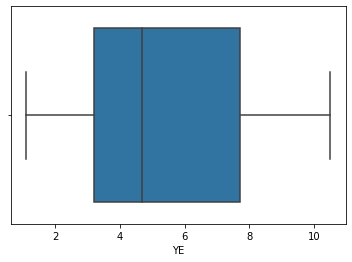

In [42]:
sns.boxplot(data1['YE'], orient = 'h')

* The data for Year Experience is skewed right.

* All the observations lies in the intervals of approximately 3 to 8

* We can say that the median years of experience is 5.2 years.

C:\Users\ROHINI\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YE', ylabel='Density'>

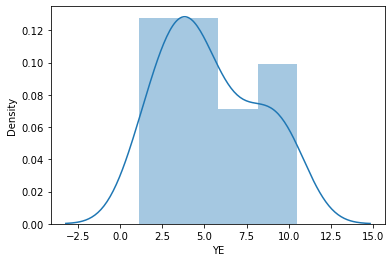

In [43]:
sns.distplot(data1['YE'])

* The distribution of Year Experience data is slightly more on the right tail of the curve

In [44]:
print(skew(data1.Sal))

0.3361618825592921


C:\Users\ROHINI\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sal'>

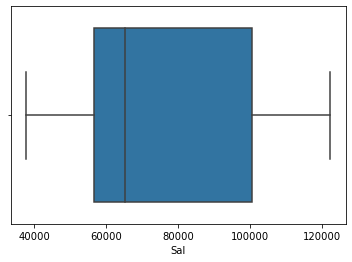

In [45]:
sns.boxplot(data1['Sal'], orient='h')

* The onservations for Salary lies nearly between 57000 to 110000.
* The data is skewed towars right side.
* The median Salary is nearly 65000.

C:\Users\ROHINI\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sal', ylabel='Density'>

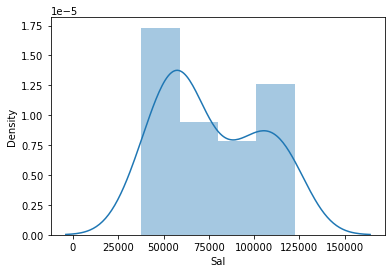

In [46]:
sns.distplot(data1['Sal'])

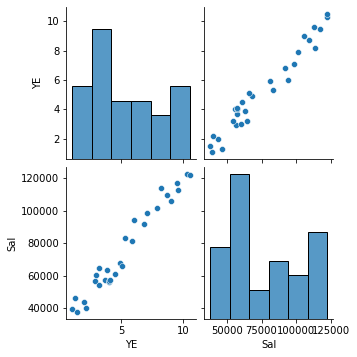

In [47]:
sns.pairplot(data1)

C:\Users\ROHINI\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

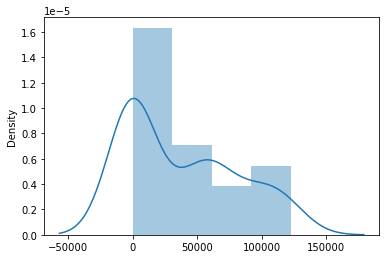

In [48]:
sns.distplot(data1)

## Correlation analysis

In [49]:
data1.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


<AxesSubplot:>

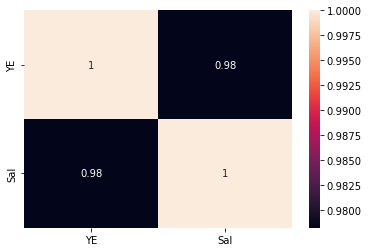

In [50]:
sns.heatmap(data1.corr(), annot=True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

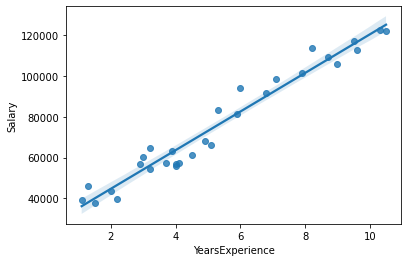

In [51]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

## Model building

In [52]:
model=smf.ols('Salary~YearsExperience',data=dataset).fit()

In [53]:
model1

In [54]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        11:25:04   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [57]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [58]:
#model prediction
# Manual prediction for say 2 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

### # Automatic Prediction for say 2 & 6Years Experience

In [59]:
new_data=pd.Series([2,6])
new_data

0    2
1    6
dtype: int64

In [60]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2
1,6


In [61]:
model.predict(data_pred)

0    44692.124842
1    82491.974127
dtype: float64

## From above we can say that this is the best model.